In [1]:
# In this assignment students will build the random forest model after normalizing the variable to house pricing from boston 
# data set.

# Following the code to get data into the environment:
#     import numpy as np
#     import pandas as pd
#     import matplotlib.pyplot as plt
#     import seaborn as sns
#     from sklearn.model_selection import train_test_split
#     from sklearn.preprocessing import StandardScaler
#     from sklearn import datasets
#     boston = datasets.load_boston()
#     features = pd.DataFrame(boston.data, columns=boston.feature_names)
#     targets = boston.target

## Import Libraries

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for Statistical analysis
import scipy.stats as stats

# Machine Learning
import sklearn

## Import LinearRegression Module - Modelling
from sklearn.linear_model import LinearRegression

## Import RandomForestRegressor Module - Modelling
from sklearn.ensemble import RandomForestRegressor

## for Model Data Preprocessing
from sklearn.preprocessing import StandardScaler

## Import train_test_split Module
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, cross_val_score,KFold 

## Importing mean_squared_error and r2_score from sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score





In [2]:
## Import boston dataset
from sklearn.datasets import load_boston

### Load Boston dataset   
boston = load_boston()

# Understand the Dataset and the Data

In [3]:
# Information about the dataset
print(boston) 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
# keys of boston dataset dictionary
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [5]:
# Shape
boston.data.shape

(506, 13)

In [6]:
# Get the column names in the dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Create features and target dataframe 
df_features = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = boston.target

In [9]:
df_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Shape of the dataframe
df_features.shape

(506, 13)

**The dataframe is missing the target or dependent column.**


In [12]:
# Updating the dataframe by adding the target column  
df_features["PRICE"] = df_target

In [14]:
df_features.get_dtype_counts() 

float64    14
dtype: int64

*The columns' datatypes are all numeric*

In [15]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


*No cleaning required as the data is already cleaned and has no null or NaN values*

## Statistical Information

In [17]:
# Getting basic statistical information about the columns
df_features.describe() # Only numerical columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
# Getting correlation between various numerical columns
df_features.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


***The column RM is highly correlated with PRICE. (Correlation = 0.695)*** 

***The column LSTAT is highly negatively correlated with PRICE. (Correlation = -0.737)***

***The columns INDUS, NOX, TAX, PTRATIO are moderately negatively correlated with PRICE(-0.7 < Correlations < -0.4)***

## Data Exploration - Visual Analysis

## Uni-variate

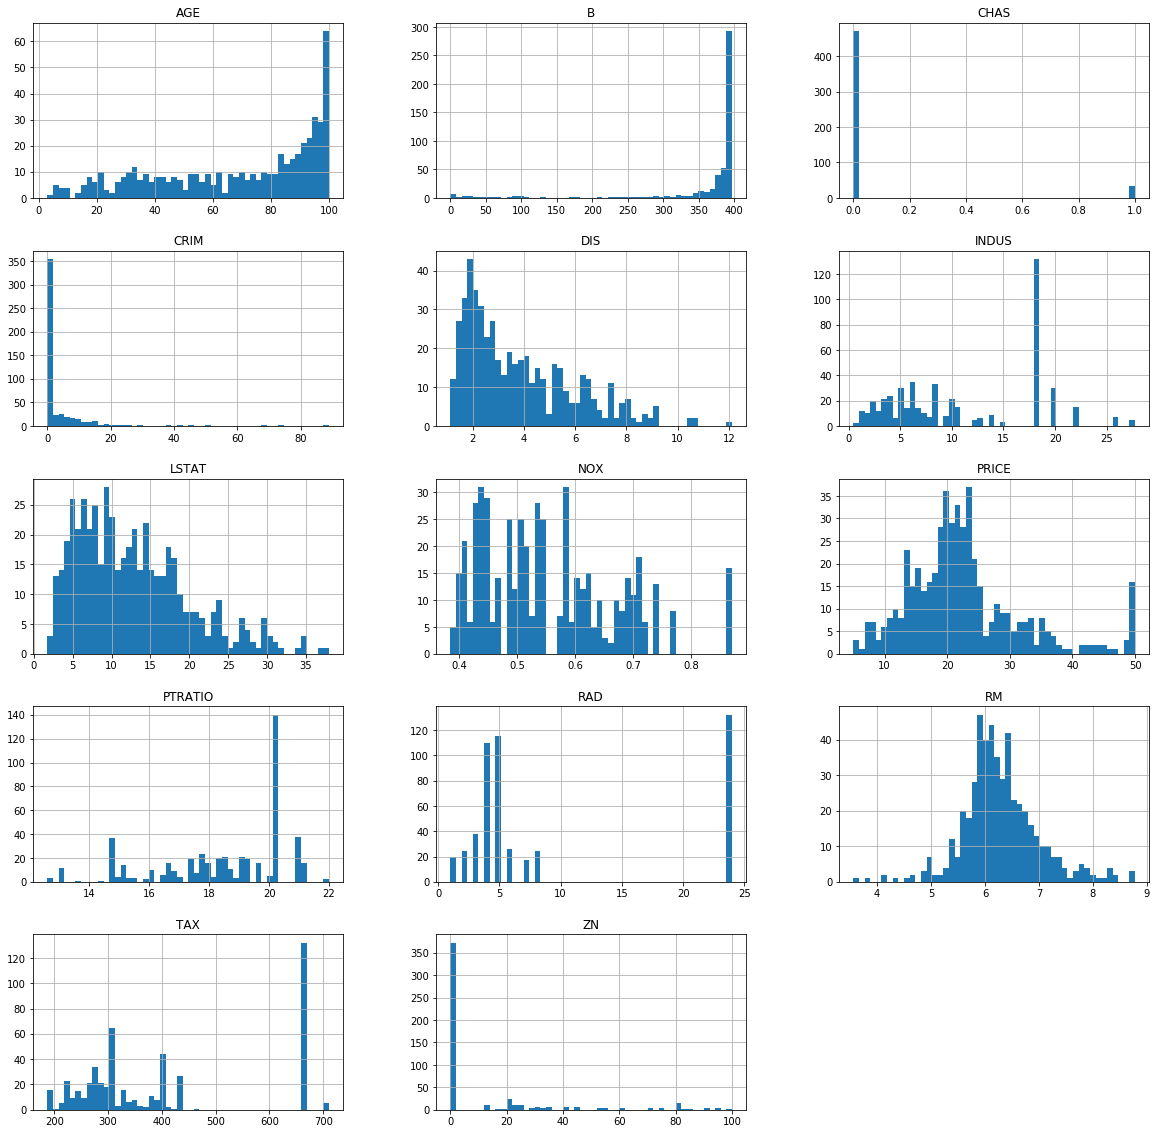

In [21]:
# Plotting the histograms of numerical columns to understand their distribution
df_features.hist(bins=50, figsize=(20,20), layout=(5,3)) 
plt.show() 

## Bi-Variate

***Plotting: PRICE  vs  RM, LSTAT, INDUS, NOX, TAX and PTRATIO***

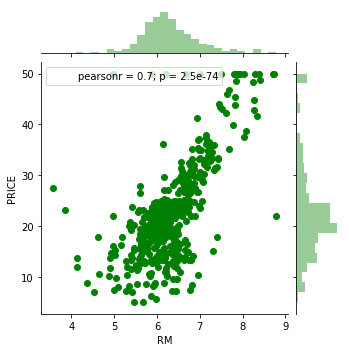

In [35]:
 sns.jointplot(x=df_features["RM"], y=df_features["PRICE"], kind='scatter',size = 5,color='green')

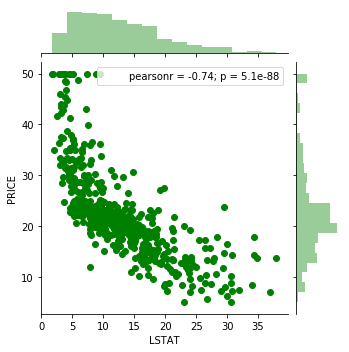

In [36]:
 sns.jointplot(x=df_features["LSTAT"], y=df_features["PRICE"], kind='scatter',size = 5,color='green',ratio=5)

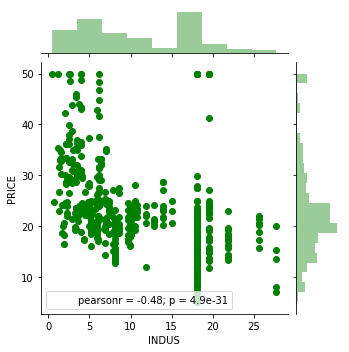

In [37]:
 sns.jointplot(x= df_features["INDUS"], y= df_features["PRICE"], kind='scatter',size = 5, color='green')

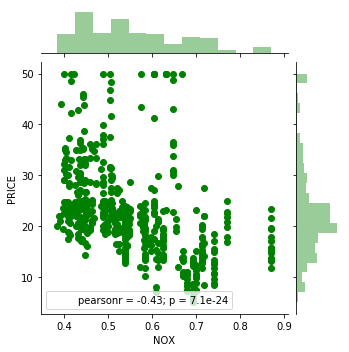

In [39]:
 sns.jointplot(x= df_features["NOX"], y= df_features["PRICE"], kind='scatter',size = 5, color='green')

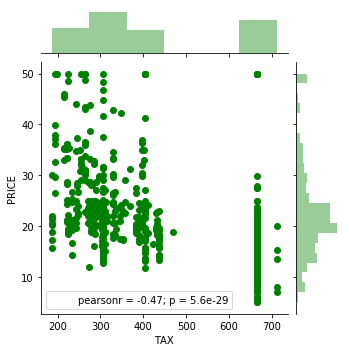

In [40]:
 sns.jointplot(x= df_features["TAX"], y= df_features["PRICE"], kind='scatter',size = 5, color='green')

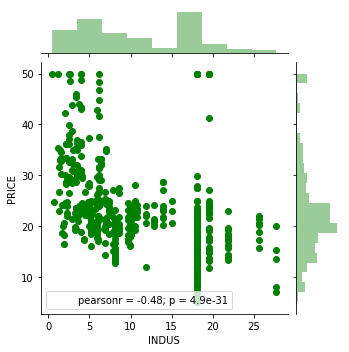

In [41]:
 sns.jointplot(x= df_features["INDUS"], y= df_features["PRICE"], kind='scatter',size = 5, color='green')

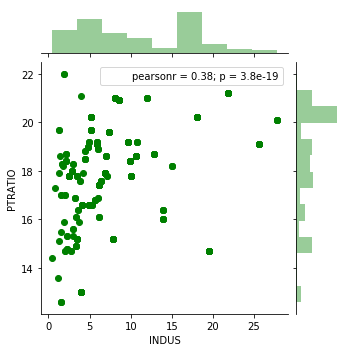

In [42]:
 sns.jointplot(x= df_features["INDUS"], y= df_features["PTRATIO"], kind='scatter',size = 5, color='green')

## Multi-Variate

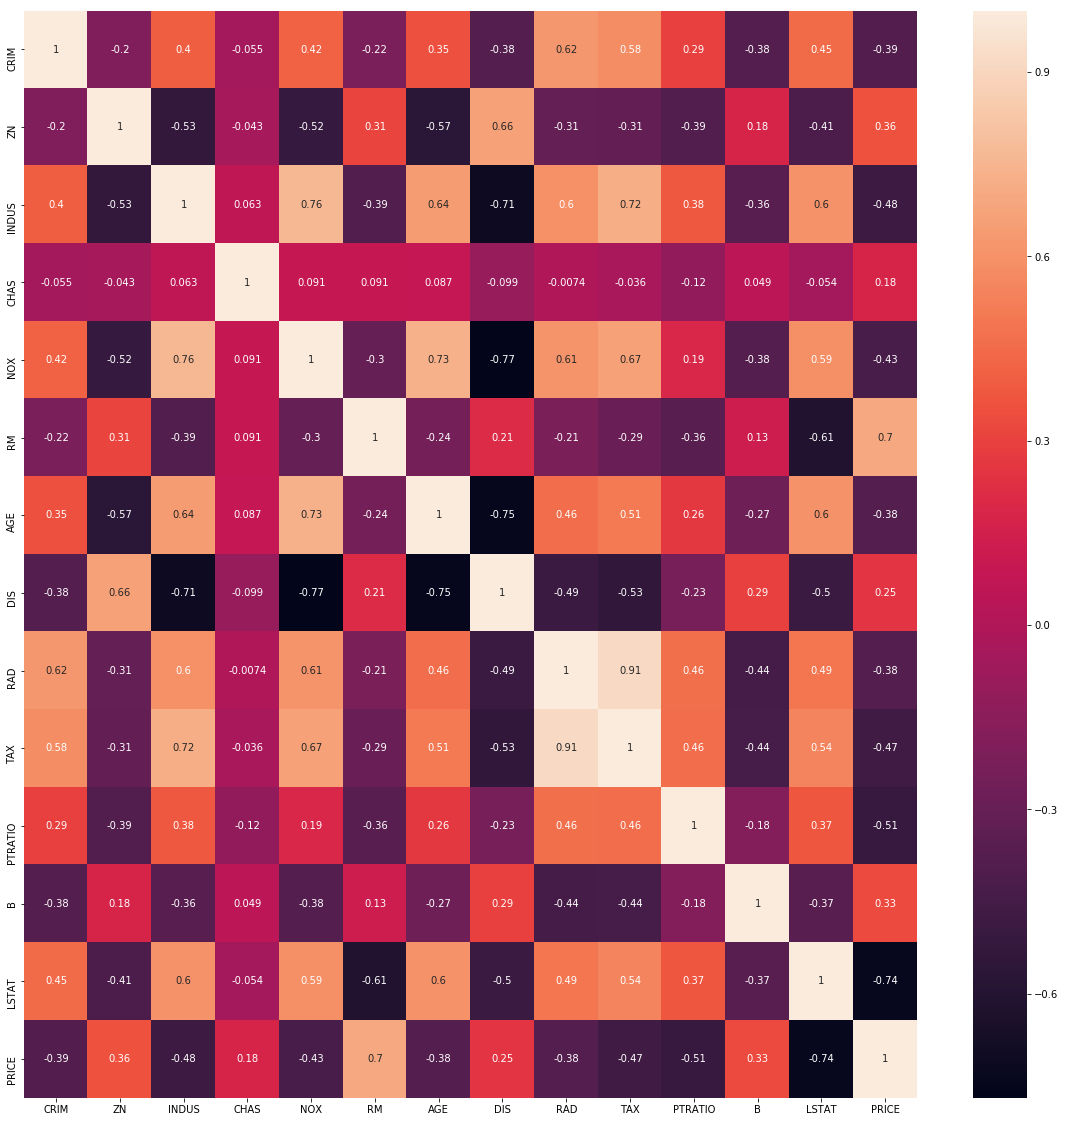

In [45]:
# Checking for correlations using HEATMAP
plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr(),  annot= True,)

# Train - Test Split

In [46]:
X = df_features.drop("PRICE", axis=1)
Y = df_features["PRICE"]

# We will be using 80:20 split for train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state = 100)

In [47]:
print(x_train.shape, x_test.shape)

(404, 13) (102, 13)


In [48]:
print(y_train.shape, y_test.shape)

(404,) (102,)


# Fitting Models

## Linear Regression

In [49]:
lm = LinearRegression()
model = lm.fit(x_train, y_train) # Sklearn already considers the intercepts for linear regression
print("Beta Coefficients: \n", model.coef_)

y_test_pred = model.predict(x_test)

print("\nLinear Regression - Base", "\n\t R2-Score:", model.score(x_test, y_test),
                         "\n\t RMSE:", math.sqrt(mean_squared_error(y_test_pred, y_test)),"\n")

Beta Coefficients: 
 [-8.01644009e-02  4.79926054e-02 -5.07131765e-03  3.06486600e+00
 -1.61596810e+01  3.66858142e+00 -8.46805789e-03 -1.51719956e+00
  2.86612524e-01 -1.21155515e-02 -9.24761912e-01  9.62688265e-03
 -4.86676845e-01]

Linear Regression - Base 
	 R2-Score: 0.7554467329645154 
	 RMSE: 4.8602941263454005 



## RandomForestRegressor

In [57]:
rf_reg = RandomForestRegressor(n_estimators=300)
rf_model= rf_reg.fit(x_train, y_train)
y_test_pred = rf_model.predict(x_test)

print("## RandomForest Regressor - Unscaled Data", "\n\t R2-Score:", rf_model.score(x_test, y_test),
                         "\n\t RMSE:", math.sqrt(mean_squared_error(y_test_pred, y_test)),"\n")

## RandomForest Regressor - Unscaled Data 
	 R2-Score: 0.8831780100265472 
	 RMSE: 3.359217447321299 



## RandomForestRegressor with StandardScaled data

In [59]:
std_scaler = StandardScaler()
scaled_features = std_scaler.fit_transform(df_features)
scaled_features = pd.DataFrame(scaled_features, columns = df_features.columns.values)
scaled_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [60]:
X_scaled = scaled_features.drop("PRICE", axis=1)
Y_scaled = scaled_features["PRICE"]

# We will be using 80:20 split for train and test datasets
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled,Y_scaled,test_size=0.20, random_state = 10)

In [70]:
rf_reg = RandomForestRegressor(n_estimators=300)
rf_model_scaled = rf_reg.fit(x_scaled_train, y_scaled_train)
y_scaled_test_pred = rf_model_scaled.predict(x_scaled_test)

print("## RandomForestRegressor - ScaledData", "\n\t R2-Score:", rf_model_scaled.score(x_scaled_test, y_scaled_test),
                         "\n\t RMSE:", math.sqrt(mean_squared_error(y_scaled_test_pred, y_scaled_test)),"\n")

## RandomForestRegressor - ScaledData 
	 R2-Score: 0.858970879213047 
	 RMSE: 0.41798310557617213 



# Feature Selection

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

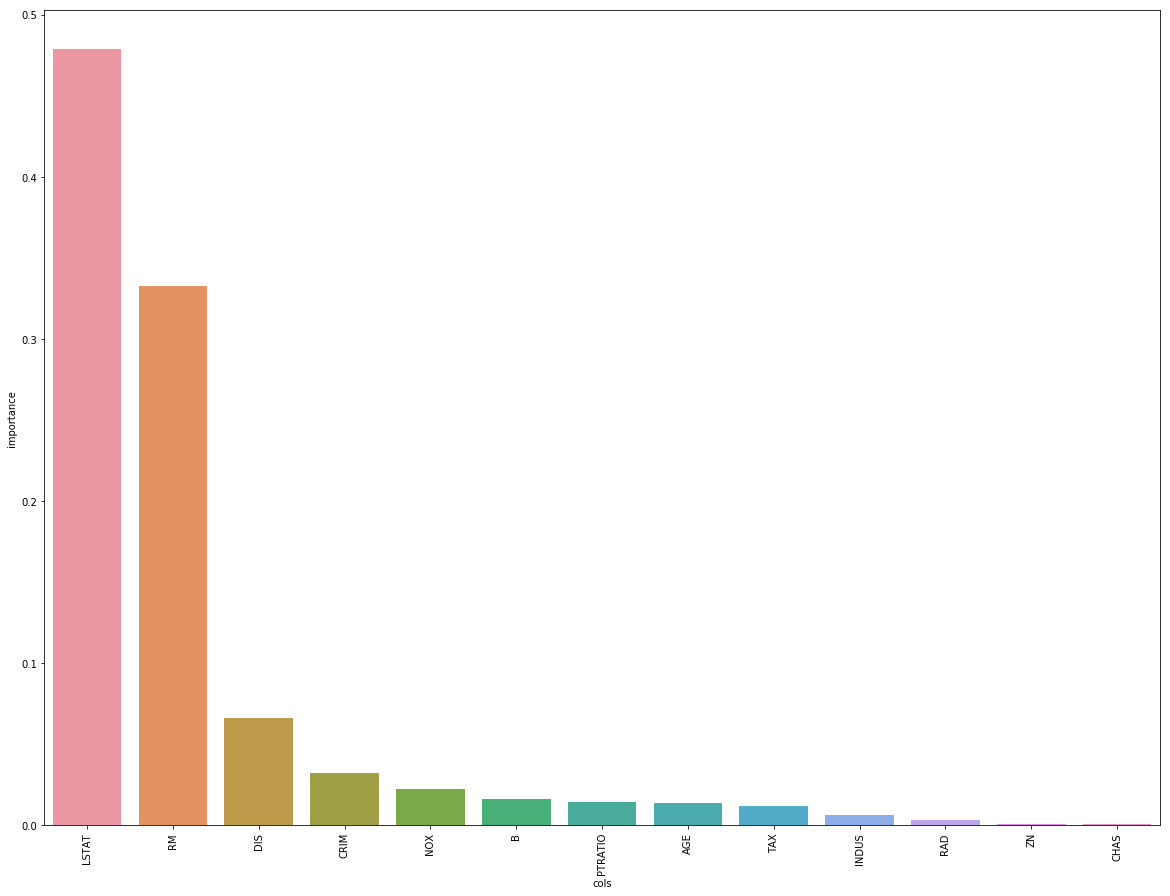

In [71]:
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': rf_reg.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [72]:
imp_cols = importance[importance.importance >= 0.01].cols.values
imp_cols

array(['LSTAT', 'RM', 'DIS', 'CRIM', 'NOX', 'B', 'PTRATIO', 'AGE', 'TAX'],
      dtype=object)

In [73]:
# Fitting models with columns where feature importance>=0.01

x_train, x_test, y_train, y_test = train_test_split(X[imp_cols],Y,test_size=0.20, random_state = 100)

rf_reg = RandomForestRegressor(n_estimators=300)
rf_model= rf_reg.fit(x_train, y_train)
y_test_pred = rf_model.predict(x_test)

print("## RandomForest Regressor - Unscaled Data", "\n\t R2-Score:", rf_model.score(x_test, y_test),
                         "\n\t RMSE:", math.sqrt(mean_squared_error(y_test_pred, y_test)),"\n")



x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled[imp_cols],Y_scaled,test_size=0.20, random_state = 100)

rf_reg = RandomForestRegressor(n_estimators=300)
rf_model_scaled = rf_reg.fit(x_scaled_train, y_scaled_train)
y_scaled_test_pred = rf_model_scaled.predict(x_scaled_test)

print("## RandomForestRegressor - Scaled Data", "\n\t R2-Score:", rf_model_scaled.score(x_scaled_test, y_scaled_test),
                         "\n\t RMSE:", math.sqrt(mean_squared_error(y_scaled_test_pred, y_scaled_test)),"\n")

## RandomForest Regressor - Unscaled Data 
	 R2-Score: 0.8909161095588827 
	 RMSE: 3.2460568876843183 

## RandomForestRegressor - Scaled Data 
	 R2-Score: 0.8841995877916082 
	 RMSE: 0.36400666676587023 



In [44]:
imp_cols = importance[importance.importance >= 0.005].cols.values
imp_cols

array(['RM', 'LSTAT', 'DIS', 'CRIM', 'TAX', 'AGE', 'NOX', 'PTRATIO', 'B',
       'INDUS'], dtype=object)

In [75]:
# Fitting models with columns where feature importance>=0.005

x_train, x_test, y_train, y_test = train_test_split(X[imp_cols],Y,test_size=0.20, random_state = 100)

rf_reg = RandomForestRegressor(n_estimators=300)
rf_model= rf_reg.fit(x_train, y_train)
y_test_pred = rf_model.predict(x_test)

print("## RandomForest Regressor - Unscaled Data", "\n\t R2-Score:", rf_model.score(x_test, y_test),
                         "\n\t RMSE:", math.sqrt(mean_squared_error(y_test_pred, y_test)),"\n")



x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled[imp_cols],Y_scaled,test_size=0.20, random_state = 100)

rf_reg = RandomForestRegressor(n_estimators=300)
rf_model_scaled = rf_reg.fit(x_scaled_train, y_scaled_train)
y_scaled_test_pred = rf_model_scaled.predict(x_scaled_test)

print("## RandomForestRegressor - Scaled Data", "\n\t R2-Score:", rf_model_scaled.score(x_scaled_test, y_scaled_test),
                         "\n\t RMSE:", math.sqrt(mean_squared_error(y_scaled_test_pred, y_scaled_test)),"\n")

## RandomForest Regressor - Unscaled Data 
	 R2-Score: 0.8883756776862378 
	 RMSE: 3.283637713405305 

## RandomForestRegressor - Scaled Data 
	 R2-Score: 0.8863056213746607 
	 RMSE: 0.3606814287626558 



In [76]:
imp_cols = importance[importance.importance >= 0.002].cols.values
imp_cols

array(['LSTAT', 'RM', 'DIS', 'CRIM', 'NOX', 'B', 'PTRATIO', 'AGE', 'TAX',
       'INDUS', 'RAD'], dtype=object)

In [77]:
# Fitting models with columns where feature importance>=0.002

x_train, x_test, y_train, y_test = train_test_split(X[imp_cols],Y,test_size=0.20, random_state = 100)

rf_reg = RandomForestRegressor(n_estimators=300)
rf_model= rf_reg.fit(x_train, y_train)
y_test_pred = rf_model.predict(x_test)

print("## RandomForest Regressor - Unscaled Data", "\n\t R2-Score:", rf_model.score(x_test, y_test),
                         "\n\t RMSE:", math.sqrt(mean_squared_error(y_test_pred, y_test)),"\n")



x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled[imp_cols],Y_scaled,test_size=0.20, random_state = 100)

rf_reg = RandomForestRegressor(n_estimators=300)
rf_model_scaled = rf_reg.fit(x_scaled_train, y_scaled_train)
y_scaled_test_pred = rf_model_scaled.predict(x_scaled_test)

print("## RandomForestRegressor - Scaled Data", "\n\t R2-Score:", rf_model_scaled.score(x_scaled_test, y_scaled_test),
                         "\n\t RMSE:", math.sqrt(mean_squared_error(y_scaled_test_pred, y_scaled_test)),"\n")

## RandomForest Regressor - Unscaled Data 
	 R2-Score: 0.88591871727993 
	 RMSE: 3.319579051226533 

## RandomForestRegressor - Scaled Data 
	 R2-Score: 0.8797851046864629 
	 RMSE: 0.3708800103712238 



# Validation

In [78]:
# Cross validating the model  with k-fold(10-fold) cross validation
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=10, random_state=100)

cv_results = cross_val_score(model, x_train,y_train, cv=kfold, scoring=scoring)
print("## Linear Regression","\n\t CV-Mean:", cv_results.mean(),
                                                 "\n\t CV-Std. Dev:",  cv_results.std(),"\n")

cv_results = cross_val_score(rf_model, x_train,y_train, cv=kfold, scoring=scoring)
print("## RandomForestRegressor - Unscaled data","\n\t CV-Mean:", cv_results.mean(),
                                                 "\n\t CV-Std. Dev:",  cv_results.std(),"\n")

cv_results = cross_val_score(rf_model_scaled, x_scaled_train,y_scaled_train, cv=kfold, scoring=scoring)
print("## RandomForestRegressor - Scaled data","\n\t CV-Mean:", cv_results.mean(),
                                                 "\n\t CV-Std. Dev:",  cv_results.std(),"\n")

## Linear Regression 
	 CV-Mean: -24.501361520600767 
	 CV-Std. Dev: 7.478252464774982 

## RandomForestRegressor - Unscaled data 
	 CV-Mean: -11.381376675067738 
	 CV-Std. Dev: 4.948746390020726 

## RandomForestRegressor - Scaled data 
	 CV-Mean: -0.13172337699642578 
	 CV-Std. Dev: 0.05559765819259556 



# Optimization - Model Tuning

In [79]:
RF_Regressor =  RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state = 100)

CV = ShuffleSplit(test_size=0.20, random_state=100)

param_grid = {"max_depth": [5, None],
              "n_estimators": [100, 150, 200, 250,300],
              "min_samples_split": [2, 4, 5],
              "min_samples_leaf": [2, 4, 6]
             }

## Best Estimator - Unscaled Data

In [80]:
rscv_grid1 = GridSearchCV(RF_Regressor, param_grid=param_grid, verbose=1)

In [81]:
rscv_grid1.fit(x_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, None], 'n_estimators': [100, 150, 200, 250, 300], 'min_samples_split': [2, 4, 5], 'min_samples_leaf': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [82]:
rscv_grid1.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 300}

In [83]:
# Best Estimator - Unscaled
rf_model = rscv_grid1.best_estimator_
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [84]:
rf_model.score(x_test, y_test)

0.8782056340913643

## Best Estimator - Scaled Data

In [85]:
rscv_grid2 = GridSearchCV(RF_Regressor, param_grid=param_grid, verbose=1)

In [86]:
rscv_grid2.fit(x_scaled_train, y_scaled_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, None], 'n_estimators': [100, 150, 200, 250, 300], 'min_samples_split': [2, 4, 5], 'min_samples_leaf': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [87]:
rscv_grid2.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [88]:
# Best Estimator - Scaled
rf_model_scaled = rscv_grid2.best_estimator_
rf_model_scaled.fit(x_scaled_train, y_scaled_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [89]:
rf_model_scaled.score(x_scaled_test, y_scaled_test)

0.877992531910148

# Comparing Performance Metrics

In [90]:
print("RandomForestRegressor - Unscaled Data\n\t R2-Score:", rf_model.score(x_test, y_test),
                 "\n\t RMSE:", math.sqrt(mean_squared_error(rf_model.predict(x_test), y_test)),"\n")

print("RandomForestRegressor - Scaled Data\n\t R2-Score:", rf_model_scaled.score(x_scaled_test, y_scaled_test),
                 "\n\t RMSE:", math.sqrt(mean_squared_error(rf_model_scaled.predict(x_scaled_test), y_scaled_test)),"\n")
      

RandomForestRegressor - Unscaled Data
	 R2-Score: 0.8782056340913643 
	 RMSE: 3.4299628541253773 

RandomForestRegressor - Scaled Data
	 R2-Score: 0.877992531910148 
	 RMSE: 0.3736349490623075 



# Choosing the model

***We can see that Random Forest Regressor trained on scaled data gives better RMSE value (= 0.3736). So, we can go with Random Forest Regressor trained on scaled data for this dataset.***